<a href="https://colab.research.google.com/github/jeffersonmfl/Sprint-IA/blob/main/Sprint_IOT_IOB_IA.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

Exemplo de código Python para realizar uma análise de dados da demora no atendimento hospitalar. Usaremos bibliotecas como Pandas, Scikit-learn, Matplotlib e Seaborn. O processo será dividido em etapas, desde a análise exploratória até a modelagem de machine learning.

Vamos criar um exemplo de dataset fictício chamado hospital_wait_times.csv para a análise da demora no atendimento hospitalar. O dataset incluirá as seguintes colunas:

- paciente_id: Identificador único de cada paciente
- tempo_espera: Tempo de espera em minutos
- num_medicos: Número de médicos disponíveis no plantão
- hora_chegada: Hora de chegada do paciente (em formato 24h)
- dia_da_semana: Dia da semana em que o paciente chegou
- severidade: Severidade do caso (Baixa, Média, Alta)

Vamos gerar 100 registros com dados aleatórios para simular esse cenário.

In [ ]:
import pandas as pd
import numpy as np
import random

# Definindo os dados
np.random.seed(42)

num_pacientes = 100
paciente_id = np.arange(1, num_pacientes + 1)
tempo_espera = np.random.randint(5, 180, size=num_pacientes)  # Tempo de espera entre 5 e 180 minutos
num_medicos = np.random.randint(1, 10, size=num_pacientes)  # Número de médicos disponíveis entre 1 e 10
hora_chegada = np.random.randint(0, 24, size=num_pacientes)  # Hora de chegada entre 0 e 23
dia_da_semana = np.random.choice(['Segunda', 'Terça', 'Quarta', 'Quinta', 'Sexta', 'Sábado', 'Domingo'], size=num_pacientes)
severidade = np.random.choice(['Baixa', 'Média', 'Alta'], size=num_pacientes)

# Criando o DataFrame
df = pd.DataFrame({
    'paciente_id': paciente_id,
    'tempo_espera': tempo_espera,
    'num_medicos': num_medicos,
    'hora_chegada': hora_chegada,
    'dia_da_semana': dia_da_semana,
    'severidade': severidade
})

# Salvando o dataset como CSV
df.to_csv('hospital_wait_times.csv', index=False)

print("Dataset hospital_wait_times.csv criado com sucesso!")


Dataset hospital_wait_times.csv criado com sucesso!


#1. Importação de Bibliotecas

In [ ]:
# Importando as bibliotecas necessárias
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import mean_squared_error, r2_score
from sklearn.preprocessing import StandardScaler


#2. Carregar o Dataset

In [ ]:
# Carregando os dados
df = pd.read_csv('hospital_wait_times.csv')

# Exibindo as primeiras linhas do dataset
print(df.head())


   paciente_id  tempo_espera  num_medicos  hora_chegada dia_da_semana  \
0            1           107            1            10         Sexta   
1            2            97            5            15        Sábado   
2            3            19            7            15       Segunda   
3            4           111            9             0        Quinta   
4            5            76            7             8       Domingo   

  severidade  
0      Média  
1      Média  
2      Baixa  
3      Média  
4      Média  


#3. Análise Exploratória de Dados (EDA)
Primeiro, faremos uma análise básica dos dados, visualizando estatísticas descritivas e gráficos.

       paciente_id  tempo_espera  num_medicos  hora_chegada
count   100.000000    100.000000   100.000000    100.000000
mean     50.500000     89.560000     4.930000     11.000000
std      29.011492     50.433939     2.663843      7.415517
min       1.000000      6.000000     1.000000      0.000000
25%      25.750000     52.750000     3.000000      4.000000
50%      50.500000     92.000000     5.000000     11.000000
75%      75.250000    134.250000     7.000000     18.000000
max     100.000000    179.000000     9.000000     23.000000
paciente_id      0
tempo_espera     0
num_medicos      0
hora_chegada     0
dia_da_semana    0
severidade       0
dtype: int64


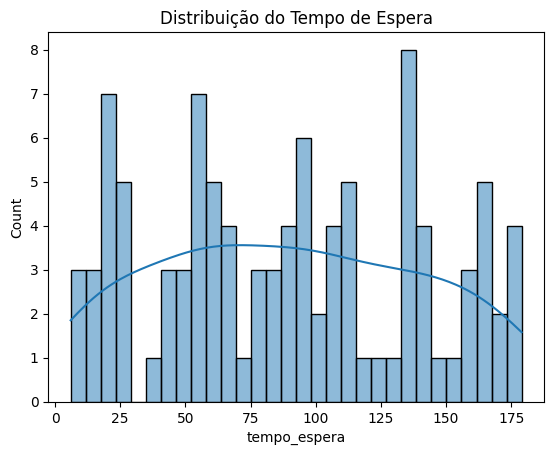

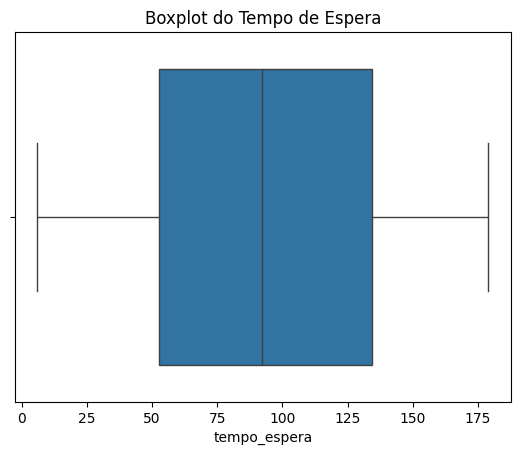

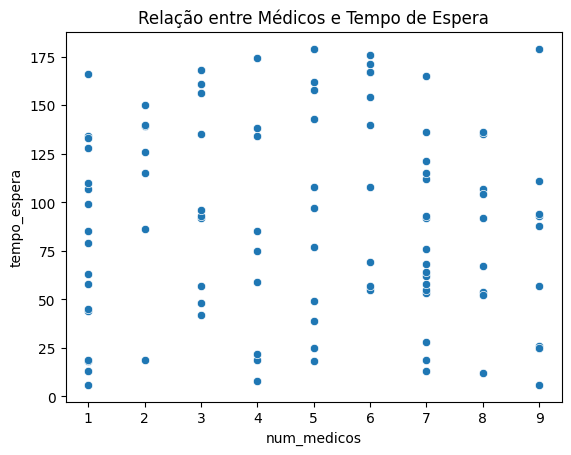

In [ ]:
# Estatísticas descritivas básicas
print(df.describe())

# Verificar se há valores nulos
print(df.isnull().sum())

# Distribuição do tempo de espera
sns.histplot(df['tempo_espera'], bins=30, kde=True)
plt.title('Distribuição do Tempo de Espera')
plt.show()

# Boxplot para identificar outliers
sns.boxplot(x='tempo_espera', data=df)
plt.title('Boxplot do Tempo de Espera')
plt.show()

# Gráfico de dispersão para verificar relação entre número de médicos e tempo de espera
sns.scatterplot(x='num_medicos', y='tempo_espera', data=df)
plt.title('Relação entre Médicos e Tempo de Espera')
plt.show()


#4. Transformação e Preprocessamento
Vamos converter algumas variáveis categóricas em numéricas e lidar com possíveis valores nulos.

In [ ]:
# Convertendo variáveis categóricas para numéricas
df['dia_da_semana'] = df['dia_da_semana'].astype('category').cat.codes
df['severidade'] = df['severidade'].astype('category').cat.codes

# Preenchendo valores nulos (se existirem)
df.fillna(df.mean(), inplace=True)

# Verificando se todas as colunas estão preparadas
print(df.dtypes)


paciente_id      int64
tempo_espera     int64
num_medicos      int64
hora_chegada     int64
dia_da_semana     int8
severidade        int8
dtype: object


#5. Divisão do Conjunto de Dados
Agora vamos dividir os dados em conjuntos de treino e teste para a modelagem.

In [ ]:
# Definindo as variáveis dependentes e independentes
X = df[['num_medicos', 'hora_chegada', 'dia_da_semana', 'severidade']]
y = df['tempo_espera']

# Dividindo o conjunto de dados
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)


#6. Regressão Linear
Vamos criar um modelo de Regressão Linear para prever o tempo de espera.

In [ ]:
# Criando e treinando o modelo de Regressão Linear
reg = LinearRegression()
reg.fit(X_train, y_train)

# Fazendo previsões
y_pred_train = reg.predict(X_train)
y_pred_test = reg.predict(X_test)

# Avaliação do modelo
print("Erro Quadrático Médio no treino:", mean_squared_error(y_train, y_pred_train))
print("Erro Quadrático Médio no teste:", mean_squared_error(y_test, y_pred_test))
print("R² no treino:", r2_score(y_train, y_pred_train))
print("R² no teste:", r2_score(y_test, y_pred_test))


Erro Quadrático Médio no treino: 2521.5544243084278
Erro Quadrático Médio no teste: 2566.254209393859
R² no treino: 0.04802494265040691
R² no teste: -0.30285449314733537


#7. Random Forest
Agora vamos usar um modelo mais avançado, o Random Forest, para prever o tempo de espera com mais precisão.

In [ ]:
# Criando e treinando o modelo Random Forest
rf = RandomForestRegressor(n_estimators=100, random_state=42)
rf.fit(X_train, y_train)

# Fazendo previsões
y_pred_rf_train = rf.predict(X_train)
y_pred_rf_test = rf.predict(X_test)

# Avaliação do modelo
print("Erro Quadrático Médio no treino (Random Forest):", mean_squared_error(y_train, y_pred_rf_train))
print("Erro Quadrático Médio no teste (Random Forest):", mean_squared_error(y_test, y_pred_rf_test))
print("R² no treino (Random Forest):", r2_score(y_train, y_pred_rf_train))
print("R² no teste (Random Forest):", r2_score(y_test, y_pred_rf_test))


Erro Quadrático Médio no treino (Random Forest): 337.63789428571425
Erro Quadrático Médio no teste (Random Forest): 3141.5973799999997
R² no treino (Random Forest): 0.8725298765406606
R² no teste (Random Forest): -0.5949488742035656


#8. Importância das Variáveis
Vamos verificar a importância das variáveis no modelo Random Forest.

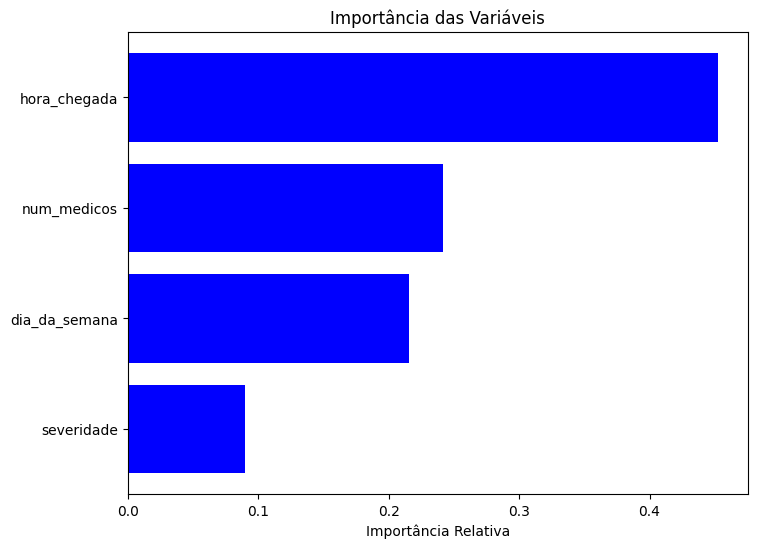

In [ ]:
# Importância das variáveis no modelo Random Forest
importances = rf.feature_importances_
features = X.columns
indices = np.argsort(importances)

# Plotando a importância das variáveis
plt.figure(figsize=(8, 6))
plt.title('Importância das Variáveis')
plt.barh(range(len(indices)), importances[indices], color='b', align='center')
plt.yticks(range(len(indices)), [features[i] for i in indices])
plt.xlabel('Importância Relativa')
plt.show()


#9. Conclusão e Próximos Passos
Com essa análise, podemos observar:

- DA ajudou a entender a distribuição e possíveis outliers.
- Regressão Linear forneceu uma linha base para prever o tempo de espera.
- Random Forest melhorou a precisão, e a análise de importância das variáveis nos mostrou quais fatores mais impactam no tempo de espera (ex.: número de médicos ou gravidade do paciente).